<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/40%EA%B8%B0_3%EC%B0%A8%EC%97%AD%EB%9F%89_%EA%B9%80%EB%8F%99%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **유명인 분석**
## sklearn에서 제공하는 데이터인 얼굴이미지를 로드하여 주어진 문제를 해결하시오.
- 분석 예측에 사용할 데이터는 유명 정치인 등의 실제 얼굴에 대한 이미지 데이터로 5,749명의 13,233개 사진을 가지고 있다.  
- 해상도는 50x37=5,828픽셀이고 각 채널이 0~255의 정수값을 가지는 컬러 이미지이다.<br>
(데이터를 컬러로 로드하면 용량이 매우 커지므로 아래의 옵션을 확인하여 흑백으로 로드할 것)
- fetch_lfw_people() 명령으로 로드한다.<br>
다음 인수를 사용하여 로드하는 데이터의 양과 종류를 결정할 수 있다.
>- funneled : 디폴트 True. 이미지의 위치 조정(funnel) 여부
>- resize : 디폴트 0.5. 원래 이미지보다 일정 비율로 크기를 줄여서 로드
>- min_faces_per_person : 디폴트 None. 각 인물당 최소 사진의 수
>- color : 디폴트 False<br>
  True인 경우에는 컬러 사진을, False인 경우에는 흑백 사진을 로드한다.

In [1]:
# Package Import

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 1) 데이터 불러오기 (주어진 문제지를 확인할 것)

# Code Here
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5, color=False)
lfw_people.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

In [3]:
# 2) hyper parameter 설정 (이미지의 정보를 확인하여 값을 설정한다.)
# width      # 이미지의 폭
# height     # 이미지의 높이
# labels     # 이미지의 데이터 값으로 정치인 실명


# Code Here
width = 62
height = 47
labels = lfw_people.target_names

In [4]:
# 3) X, y값 분리

X = lfw_people.images
y = lfw_people.target
print(X.shape)
print(y.shape)

(1560, 62, 47)
(1560,)


In [5]:
# 4) train, test 분리

# Code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1092, 62, 47) (1092,)
(468, 62, 47) (468,)


In [6]:
# 5) 데이터를 float32 타입의 값으로 스케일링

# Code here
X_train = X_train.reshape(1092, width, height, 1).astype('float64')/255
X_test = X_test.reshape(468, width, height, 1).astype('float64')/255

In [7]:
# 6) y값을 one-hot encoding 할 것

# Code here
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0].shape)
print(y_test[0].shape)

(12,)
(12,)


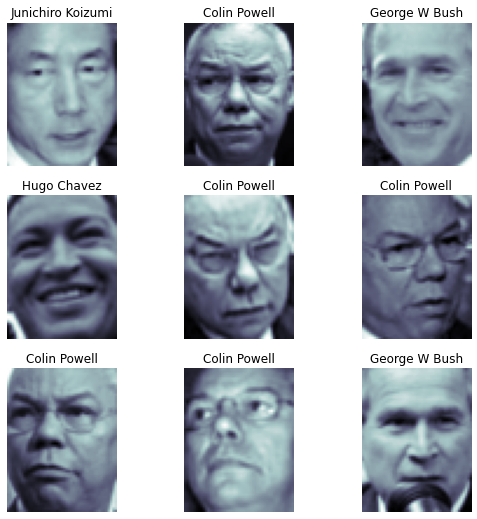

In [8]:
# 7) 아래의 코드 중 pass 부분을 수정하여 아래와 같이 3x3 그림을 출력할 것.
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 9)

row = 3
col = 3

f, axarr = plt.subplots(row, col)
cnt = 0
i = 0

while cnt < (row * col) :
  sub_plot = axarr[int(cnt/row), int(cnt%col)]
  sub_plot.axis('off')
  sub_plot.imshow(X_train[i].reshape(width, height), cmap=plt.cm.bone)
  title = labels[np.argmax(y_train[i])]
  sub_plot.set_title(title)

  i+=1
  cnt+=1

plt.show()

In [9]:
# # 8) 학습을 하기 위한 Sequential 생성하고 학습을 위해 필요한 Layer는 임의로 추가한후 summary 확인
# model = Sequential()

# # Code here
# model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=350, activation='relu'))
# model.add(Dense(units=250, activation='relu'))
# model.add(Dense(units=12, activation='softmax'))

# model.summary()

In [46]:
# 8) 학습을 하기 위한 Sequential 생성하고 학습을 위해 필요한 Layer는 임의로 추가한후 summary 확인
model = Sequential()

# Code here

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=350, activation='relu'))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=12, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 10, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4480)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 350)               1568350   
_________________________________________________________________
dense_35 (Dense)             (None, 250)              

In [47]:
# 9) compile : 컴파일에 필요한 loss function등은 임의로 설정한다.

# Code here
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# 10) 학습(fit) : 학습을 하기위해 필요한 epochs, batch_size도 임의 설정

hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) 

Epoch 1/50
35/35 [==============================] - 1s 12ms/step - loss: 2.2304 - accuracy: 0.3264 - val_loss: 2.1472 - val_accuracy: 0.3440
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1327 - accuracy: 0.3287 - val_loss: 2.0699 - val_accuracy: 0.3440
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0073 - accuracy: 0.3455 - val_loss: 1.6444 - val_accuracy: 0.5043
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.4662 - accuracy: 0.5186 - val_loss: 1.2507 - val_accuracy: 0.6026
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.0873 - accuracy: 0.6332 - val_loss: 1.0145 - val_accuracy: 0.6624
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.7189 - accuracy: 0.7763 - val_loss: 1.0190 - val_accuracy: 0.6752
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6365 - accuracy: 0.7900 - val_loss: 0.7645 - val_accuracy: 0.7906
Epoch 8/50
35/35 [=

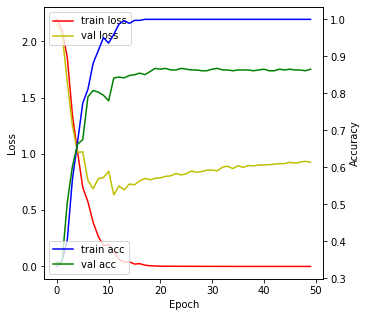

In [49]:
# 11) 위 학습데이터를 모아 선형그래프 생성 (문제지 확인할 것)
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)


# Code Here
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='val loss')
loss_ax.set_ylabel('Loss')
loss_ax.set_xlabel('Epoch')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [14]:
# 12) 예측 실시

# Code Here
yhat = model.predict(X_test, batch_size=32)

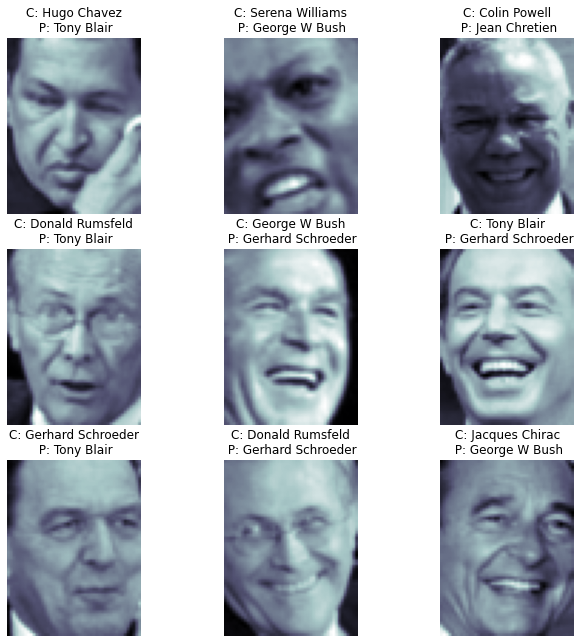

In [50]:
# 13) 잘못 예측한 데이터를 아래와 같이 그림으로 그려볼 것 (위에 그려진 데이터를 참고하여 그린다.)
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (11,11)
row = 3
col = 3

fig, axes = plt.subplots(row, col)
cnt = 0 
i = 0

while cnt < (row*col) :
  if np.argmax(y_test[i]) == np.argmax(yhat[i]):
    i = i+1
    continue
  
  sub_plot = axes[int(cnt/row), int(cnt%row)]
  sub_plot.axis('off')

  sub_plot.imshow(X_test[i].reshape(width, height), cmap = plt.cm.bone)
  tmp_title = "C: " + labels[np.argmax(y_test[i])] + "\n P: " + labels[np.argmax(yhat[i])]
  sub_plot.set_title(tmp_title)

  i = i+1
  cnt = cnt+1

plt.show()